# This Notebook contains plots 11a, 11b, and 11c

In [14]:
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
from ast import literal_eval as make_tuple
from scipy.integrate import quad
import magpylib as mp
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
import seaborn as sns
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error
import shutil
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    return butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y

In [15]:
def calc_ber(signal, fs, f):
    # Rectify signal
    signal = np.abs(signal)
    
    # Calculate BER using sliding window
    window_size = int(fs/f/2)
    #print(window_size)
    min_ber = 1
    for offset in range(1,window_size, max(int(window_size/20), 1)):
        symbol_count=0
        odd_bits=[]
        even_bits=[]
        for i in range(offset, signal.size-window_size-offset+1, window_size):
            power=(np.sum(signal[i:i+window_size]))
            if symbol_count%2==0:
                odd_bits.append(power)
            else:
                even_bits.append(power)
            symbol_count+=1
        
        threshold = (sum(even_bits)+sum(odd_bits))/(len(even_bits)+len(odd_bits))
        error_bits=0
        num_bits=len(odd_bits)+len(even_bits)
        if np.mean(odd_bits)<threshold:
            for i in odd_bits:
                if i>threshold:
                    error_bits+=1
            for i in even_bits:
                if i<threshold:
                    error_bits+=1
        else:
            for i in odd_bits:
                if i<threshold:
                    error_bits+=1
            for i in even_bits:
                if i>threshold:
                    error_bits+=1
        ber0 = error_bits / num_bits
        if ber0 < min_ber:
            min_ber = ber0
    return min_ber

In [16]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/home/jshenoy2/ProjectEspana/comm500bps/"
Ber_Mat_500  = np.zeros((10, 10))  # Low Peak Channel 1


for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    #print(info_list)
    if single_file[-1] == "b":
        channel_value = info_list[1]
        coordinate = info_list[0]
        coordinate = make_tuple(coordinate)
        x = int(coordinate[0]/10)
        y = int(coordinate[1]/10)
        signal = read_complex_binary2(files)
        filtered_signal = butter_lowpass_filter(signal,3*500 ,400e3, order=5)
        BER = calc_ber(filtered_signal,400e3,500)
        #print(BER)
        Ber_Mat_500[x][y] = BER
#plt.imshow(Ber_Mat_500)
#plt.colorbar()
print("DONE Processing")

400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
400
DONE Processing


In [17]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/home/jshenoy2/ProjectEspana/comm1kbps/"
Ber_Mat_1k  = np.zeros((10, 10))  # Low Peak Channel 1


for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    #print(info_list)
    if single_file[-1] == "b":
        channel_value = info_list[1]
        coordinate = info_list[0]
        coordinate = make_tuple(coordinate)
        x = int(coordinate[0]/10)
        y = int(coordinate[1]/10)
        signal = read_complex_binary2(files)
        filtered_signal = butter_lowpass_filter(signal,3*1000 ,400e3, order=5)
        BER = calc_ber(filtered_signal,400e3,1000)
        #print(BER)
        Ber_Mat_1k[x][y] = BER
#plt.imshow(Ber_Mat_1k)
#plt.colorbar()
print("DONE Processing")

200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
200
DONE Processing


In [18]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/home/jshenoy2/ProjectEspana/comm2kbps/"
Ber_Mat_2k  = np.zeros((10, 10))  # Low Peak Channel 1


for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    #print(info_list)
    if single_file[-1] == "b":
        channel_value = info_list[1]
        coordinate = info_list[0]
        coordinate = make_tuple(coordinate)
        x = int(coordinate[0]/10)
        y = int(coordinate[1]/10)
        signal = read_complex_binary2(files)
        filtered_signal = butter_lowpass_filter(signal,3*2000 ,400e3, order=5)
        BER = calc_ber(filtered_signal,400e3,2000)
        #print(BER)
        Ber_Mat_2k[x][y] = BER
#plt.imshow(Ber_Mat_2k)
#plt.colorbar()
print("DONE Processing")

100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
100
DONE Processing


In [19]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/home/jshenoy2/ProjectEspana/comm5kbps/"
Ber_Mat_5k  = np.zeros((10, 10))  # Low Peak Channel 1


for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    #print(info_list)
    if single_file[-1] == "b":
        channel_value = info_list[1]
        coordinate = info_list[0]
        coordinate = make_tuple(coordinate)
        x = int(coordinate[0]/10)
        y = int(coordinate[1]/10)
        signal = read_complex_binary2(files)
        filtered_signal = butter_lowpass_filter(signal,3*5000 ,400e3, order=5)
        BER = calc_ber(filtered_signal,400e3,5000)
        #print(BER)
        Ber_Mat_5k[x][y] = BER
#plt.imshow(Ber_Mat_5k)
#plt.colorbar()
print("DONE Processing")

40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
40
DONE Processing


In [20]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/home/jshenoy2/ProjectEspana/comm20kbps/"
Ber_Mat_20k  = np.zeros((10, 10))  # Low Peak Channel 1


for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    #print(info_list)
    if single_file[-1] == "b":
        channel_value = info_list[1]
        coordinate = info_list[0]
        coordinate = make_tuple(coordinate)
        x = int(coordinate[0]/10)
        y = int(coordinate[1]/10)
        signal = read_complex_binary2(files)
        filtered_signal = butter_lowpass_filter(signal,3*20000 ,400e3, order=5)
        BER = calc_ber(filtered_signal,400e3,20000)
        #print(BER)
        Ber_Mat_20k[x][y] = BER
#plt.imshow(Ber_Mat_20k)
#plt.colorbar()
print("DONE Processing")

10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10
10


['(10, 0)', 'b']
40
0.42686926869268693
['(70, 30)', 'a']
['(10, 40)', 'b']
40
0.18004590022950115
['(0, 30)', 'a']
['(40, 70)', 'a']
['(70, 90)', 'a']
['(30, 70)', 'a']
['(30, 80)', 'b']
40
0.1845418454184542
['(60, 30)', 'b']
40
0.01910019100191002
['(20, 70)', 'a']
['(90, 0)', 'a']
['(60, 10)', 'b']
40
0.1176458823941162
['(80, 20)', 'a']
['(10, 60)', 'a']
['(70, 0)', 'b']
40
0.34505570334220054
['(40, 40)', 'a']
['(50, 40)', 'a']
['(20, 80)', 'b']
40
0.1900759503797519
['(50, 60)', 'a']
['(50, 90)', 'b']
40
0.12274061370306852
['(70, 90)', 'b']
40
0.2128171281712817
['(0, 10)', 'b']
40
0.09343046715233576
['(0, 80)', 'b']
40
0.07397573975739757
['(20, 60)', 'a']
['(60, 20)', 'a']
['(90, 70)', 'a']
['(40, 60)', 'a']
['(50, 30)', 'a']
['(20, 50)', 'b']
40
0.0835646793419269
['(80, 80)', 'a']
['(60, 20)', 'b']
40
0.04876219429874344
['(0, 80)', 'a']
['(70, 70)', 'a']
['(50, 0)', 'b']
40
0.21363145474181033
['(90, 60)', 'a']
['(30, 90)', 'a']
['(40, 50)', 'b']
40
0.02126021260212602
['

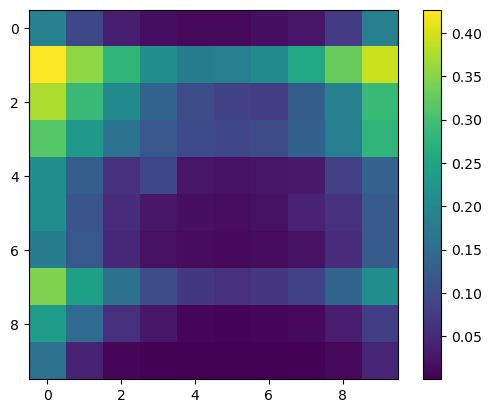

In [ ]:
def read_complex_binary2(filename):
    """ Read file of float32 into complex array.
    """

    with open(filename, 'rb') as f:
        bytes = f.read()
    data = np.frombuffer(bytes, dtype=np.float32).reshape(-1, 2)
    data = data[:, 0] + 1j*data[:, 1]
    return data

# Read the data
file_path = "/home/jshenoy2/ProjectEspana/commold/"
Ber_Mat_old  = np.zeros((10, 10))  # Low Peak Channel 1


for files in glob.glob(file_path+"*"):
    single_file = files.split("/")[-1]
    info_list = single_file.split("_")
    #print(info_list)
    if single_file[-1] == "b":
        channel_value = info_list[1]
        coordinate = info_list[0]
        coordinate = make_tuple(coordinate)
        x = int(coordinate[0]/10)
        y = int(coordinate[1]/10)
        signal = read_complex_binary2(files)
        filtered_signal = butter_lowpass_filter(signal,3*5000 ,400e3, order=5)
        BER = calc_ber(filtered_signal,400e3,5000)
        #print(BER)
        Ber_Mat_old[x][y] = BER
#plt.imshow(Ber_Mat_old)
#plt.colorbar()
print("DONE Processing")

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3
 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


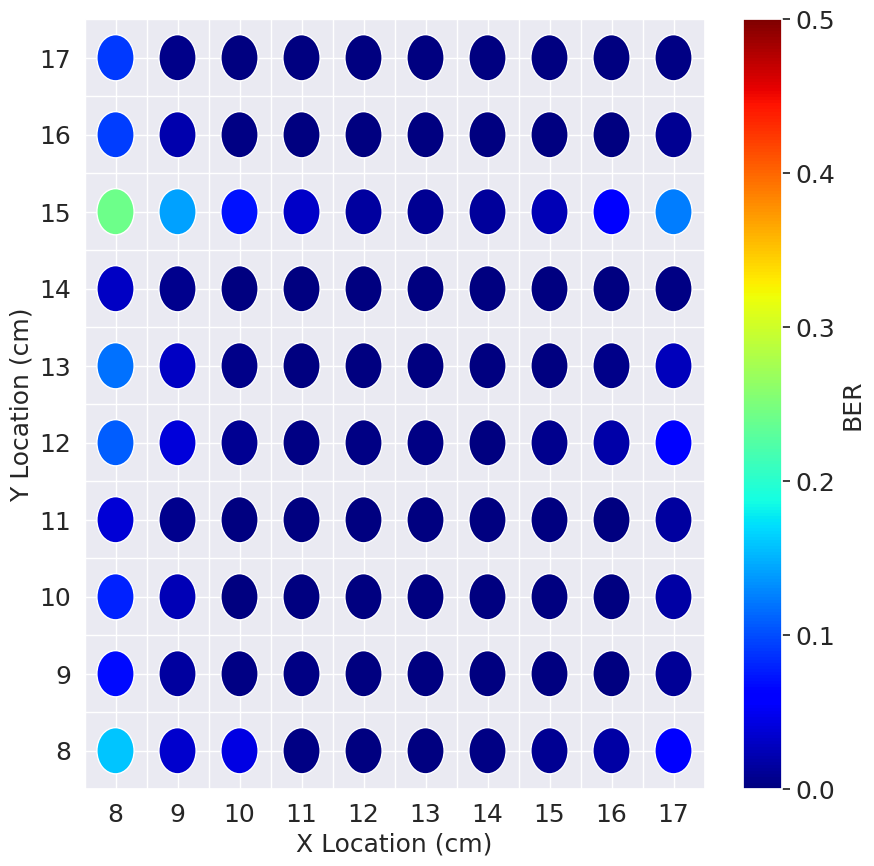

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

sns.set_theme()
N = 10
M = 1

XX,YY = np.meshgrid(np.arange(Ber_Mat_5k.shape[1]),np.arange(Ber_Mat_5k.shape[0]))
x,y = XX.flatten(),YY.flatten()
val_ct = Ber_Mat_5k.flatten()

fig, ax = plt.subplots(figsize = (10,10))
print(x)
ax.set(xticks=np.arange(8,18,1), yticks=np.arange(8,18,1))
ax.set_xticks(np.arange(18+1)-0.5, minor=True)
ax.set_yticks(np.arange(18+1)-0.5, minor=True)
circles = [plt.Circle((j+8,i+8), radius=.3) for j, i in zip(x, y)]
col = PatchCollection(circles, array=val_ct, cmap="jet")
ax.add_collection(col)
ax.set_xlabel("X Location (cm)", fontsize=18)
ax.set_ylabel("Y Location (cm)", fontsize=18)
ax.set_ylim(7.5, 17.5)
ax.set_xlim(7.5, 17.5)
ax.grid(which='minor')
cbar = fig.colorbar(col)
cbar.ax.tick_params(labelsize=18)
cbar.set_label(label='BER',size=18)
ax.tick_params(axis='both', which='major',labelsize=18)
col.set_clim(0, .5)
plt.title("Mloc datarate")
plt.show()


# fig.colorbar(col)
# plt.show()

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3
 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


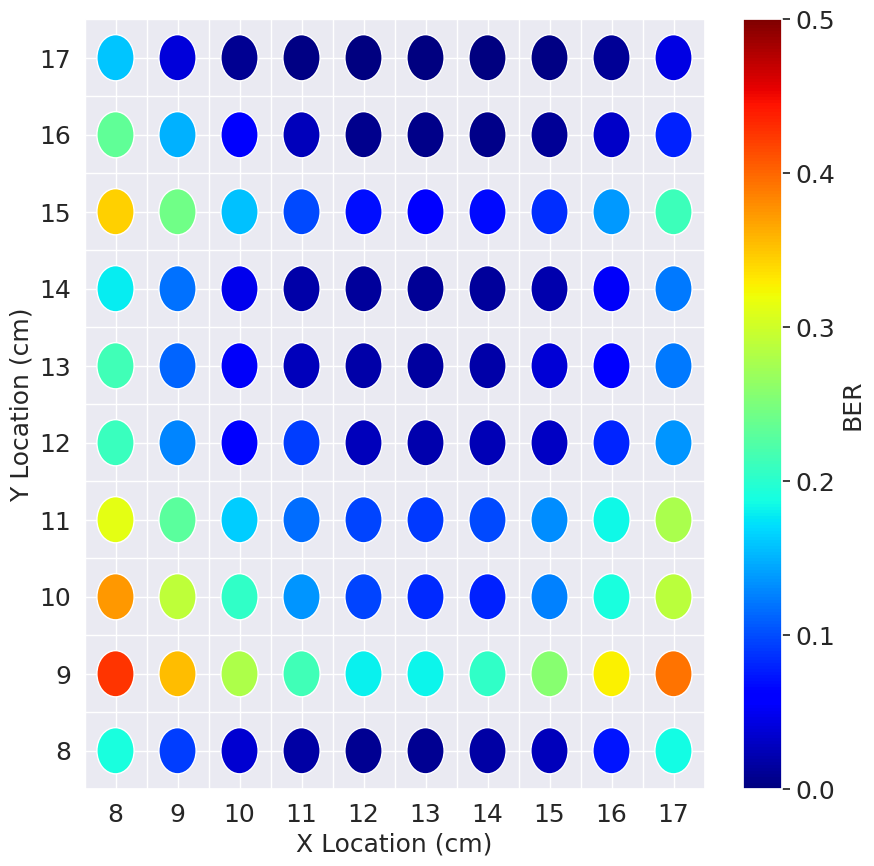

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

sns.set_theme()
N = 10
M = 1

XX,YY = np.meshgrid(np.arange(Ber_Mat_old.shape[1]),np.arange(Ber_Mat_old.shape[0]))
x,y = XX.flatten(),YY.flatten()
val_ct = Ber_Mat_old.flatten()

fig, ax = plt.subplots(figsize = (10,10))
print(x)
ax.set(xticks=np.arange(8,18,1), yticks=np.arange(8,18,1))
ax.set_xticks(np.arange(18+1)-0.5, minor=True)
ax.set_yticks(np.arange(18+1)-0.5, minor=True)
circles = [plt.Circle((j+8,i+8), radius=.3) for j, i in zip(x, y)]
col = PatchCollection(circles, array=val_ct, cmap="jet")
ax.add_collection(col)
ax.set_xlabel("X Location (cm)", fontsize=18)
ax.set_ylabel("Y Location (cm)", fontsize=18)
ax.set_ylim(7.5, 17.5)
ax.set_xlim(7.5, 17.5)
ax.grid(which='minor')
cbar = fig.colorbar(col)
cbar.ax.tick_params(labelsize=18)
ax.tick_params(axis='both', which='major',labelsize=18)
cbar.set_label(label='BER',size=18)
col.set_clim(0, .5)
plt.title("Traditional Transmitter Design")
plt.show()


# fig.colorbar(col)
# plt.show()

[0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6
 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3
 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9 0 1 2 3 4 5 6 7 8 9]


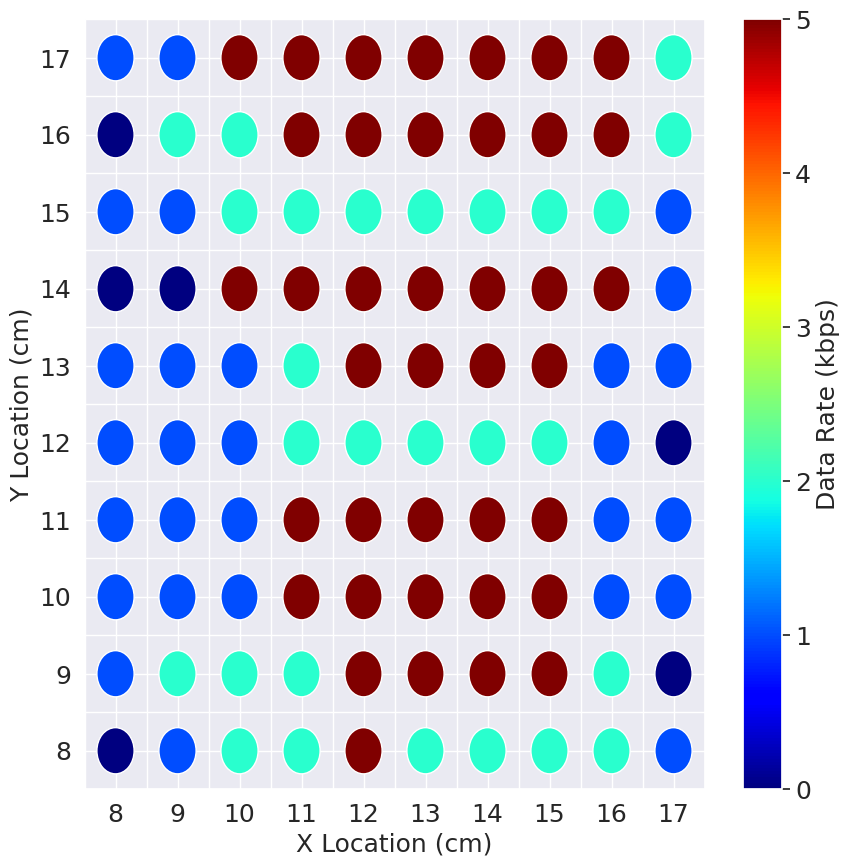

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

sns.set_theme()
N = 10
M = 1

XX,YY = np.meshgrid(np.arange(data_rates.shape[1]),np.arange(data_rates.shape[0]))
x,y = XX.flatten(),YY.flatten()
val_ct = data_rates.flatten()

fig, ax = plt.subplots(figsize = (10,10))
print(x)
ax.set(xticks=np.arange(8,18,1), yticks=np.arange(8,18,1))
ax.set_xticks(np.arange(18+1)-0.5, minor=True)
ax.set_yticks(np.arange(18+1)-0.5, minor=True)
circles = [plt.Circle((j+8,i+8), radius=.3) for j, i in zip(x, y)]
col = PatchCollection(circles, array=val_ct, cmap="jet")
ax.add_collection(col)
ax.set_xlabel("X Location (cm)", fontsize=18)
ax.set_ylabel("Y Location (cm)", fontsize=18)
ax.set_ylim(7.5, 17.5)
ax.set_xlim(7.5, 17.5)
ax.grid(which='minor')
cbar = fig.colorbar(col)
cbar.ax.tick_params(labelsize=18)
ax.tick_params(axis='both', which='major',labelsize=18)
cbar.set_label(label='Data Rate (kbps)',size=18)
#col.set_clim(0, .5)
plt.title("MLoc's Transmitter Design")
plt.show()


# fig.colorbar(col)
# plt.show()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22
 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21
 22 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20
 21 22 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19
 20 21 22 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18
 19 20 21 22 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17
 18 19 20 21 22 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16
 17 18 19 20 21 22 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15
 16 17 18 19 20 21 22 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13 14
 15 16 17 18 19 20 21 22 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12 13
 14 15 16 17 18 19 20 21 22 23 24  0  1  2  3  4  5  6  7  8  9 10 11 12
 13 14 15 16 17 18 19 20 21 22 23 24  0  1  2  3  4  5  6  7  8  9 10 11
 12 13 14 15 16 17 18 19 20 21 22 23 24  0  1  2  3

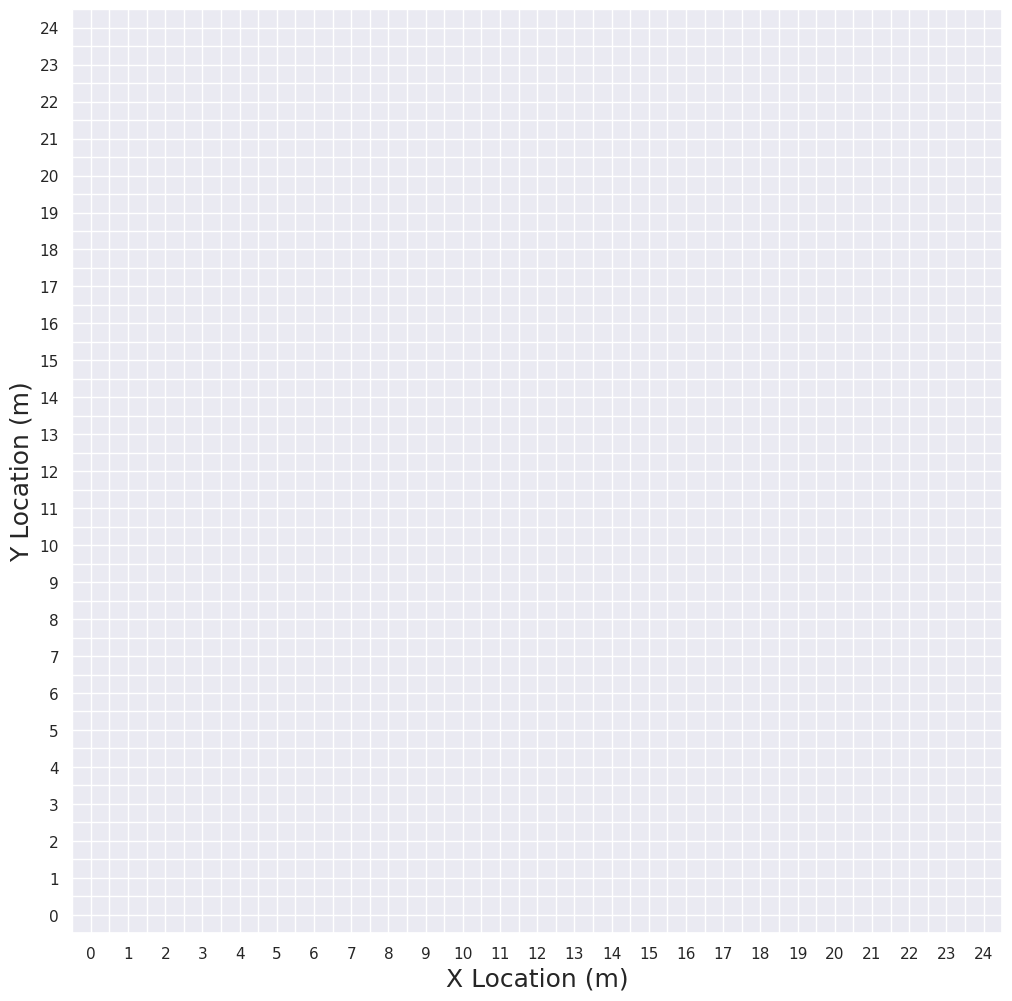

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.collections import PatchCollection

sns.set_theme()
N = 10
M = 1
rayshape =np.zeros((25,25))
XX,YY = np.meshgrid(np.arange(rayshape.shape[1]),np.arange(rayshape.shape[0]))
x,y = XX.flatten(),YY.flatten()
val_ct = Ber_Mat_old.flatten()

fig, ax = plt.subplots(figsize=(12,12))
print(x)
ax.set(xticks=np.arange(25), yticks=np.arange(25))
ax.set_xticks(np.arange(25+1)-0.5, minor=True)
ax.set_yticks(np.arange(25+1)-0.5, minor=True)
circles = [plt.Circle((j,i), radius=0) for j, i in zip(x, y)]
col = PatchCollection(circles, array=val_ct, cmap="jet")
ax.add_collection(col)
ax.set_xlabel("X Location (m)", fontsize=18)
ax.set_ylabel("Y Location (m)", fontsize=18)

ax.grid(which='minor')
#cbar = fig.colorbar(col)
#cbar.ax.tick_params(labelsize=18)
#cbar.set_label(label='BER',size=18)
plt.show()


# fig.colorbar(col)
# plt.show()

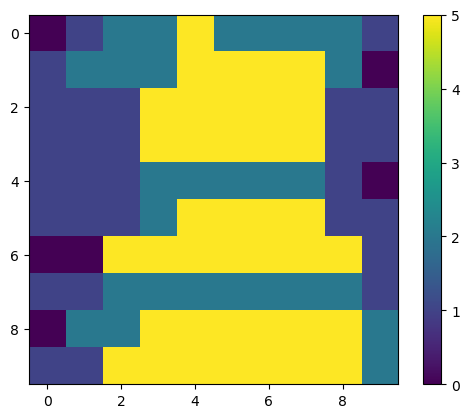

In [ ]:
threshold = 1e-3

data_rates = np.zeros((10, 10))  

for i in range(10):
    for j in range(10):
        if Ber_Mat_20k[i][j]<threshold:
            data_rates[i][j] = 20
        elif Ber_Mat_5k[i][j]<threshold:
            data_rates[i][j] = 5
        elif Ber_Mat_2k[i][j]<threshold:
            data_rates[i][j] = 2
        elif Ber_Mat_1k[i][j]<threshold:
            data_rates[i][j] = 1
        elif Ber_Mat_500[i][j]<threshold:
            data_rates[i][j] = 0.5
        else:
            data_rates[i][j] = 0
    

In [ ]:
Ber_Mat_10k = np.load('20kBER.npy')
Ber_Mat_5k = np.load('5kBER.npy')
Ber_Mat_2k = np.load('2kBER.npy')
Ber_Mat_1k = np.load('1kBER.npy')
Ber_Mat_500 = np.load('500BER.npy')

In [ ]:
errormat = Ber_Mat_old-Ber_Mat_5k
np.mean(errormat)

0.09447825183196161

In [ ]:
plt.imshow(Ber_Mat_5k)
plt.show()
plt.imshow(Ber)
plt.show()

In [ ]:
mean_list = []

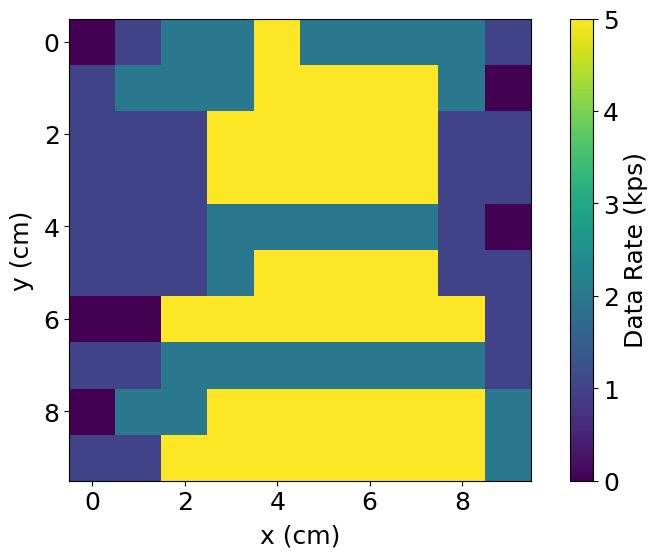

In [ ]:
fig = plt.figure(figsize=(10,6))
ax = plt.axes()
cmap = ax.imshow(data_rates)
ax.set_xlabel('x (cm)',fontsize=18,labelpad=7)
ax.set_ylabel('y (cm)',fontsize=18,labelpad=7)
ax.tick_params(axis='both', which='major',labelsize=18)
cbar = fig.colorbar(cmap)
cbar.ax.tick_params(labelsize=18)
cbar.set_label(label='Data Rate (kps)',size=18)


plt.imshow(Ber_Mat)
plt.colorbar()
print("DONE Processing")